Import the data

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-14 20:02:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  37.2MB/s    in 10s     

2022-06-14 20:02:30 (49.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



check out all of the different directories and sub-directories in the 10_food_classes file.

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [ ]:
# Setup training and test directory paths

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names from the subdirectory

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


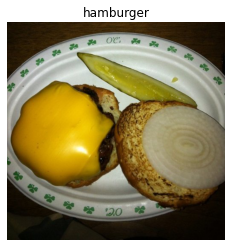

In [ ]:
# View a random image from the training dataset

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

**Preprocess the data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Make the "class_mode = 'categorical' because there are 10 classes of food images

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Create a model this time with solving a categorical problem in mind.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

**Fit a model**

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 195ms/step - loss: 2.1551 - accuracy: 0.2065 - val_loss: 2.0115 - val_accuracy: 0.2760
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.8789 - accuracy: 0.3489 - val_loss: 1.8831 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.5288 - accuracy: 0.4801 - val_loss: 2.0901 - val_accuracy: 0.3128
Epoch 4/5
235/235 [==============================] - 45s 192ms/step - loss: 0.9473 - accuracy: 0.6900 - val_loss: 2.4490 - val_accuracy: 0.2948
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.4080 - accuracy: 0.8753 - val_loss: 3.4652 - val_accuracy: 0.2708


**Evaluate the Model**

In [ ]:
# Evaluate on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 3.4652 - accuracy: 0.2708


[3.465163230895996, 0.27079999446868896]

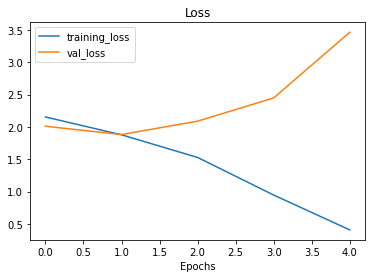

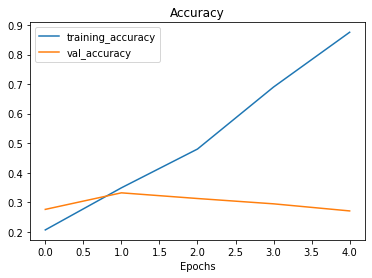

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_1)

It seems the model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

In [ ]:
# Try to Augment the data

# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


Rather than rewrite the model from scratch, a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format will be used.

In [ ]:
# Clone the model (use the same architecture)
model_2 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_10)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 473ms/step - loss: 2.2675 - accuracy: 0.1536 - val_loss: 2.1840 - val_accuracy: 0.1948
Epoch 2/5
235/235 [==============================] - 112s 476ms/step - loss: 2.1348 - accuracy: 0.2217 - val_loss: 2.0104 - val_accuracy: 0.2936
Epoch 3/5
235/235 [==============================] - 110s 468ms/step - loss: 2.0504 - accuracy: 0.2752 - val_loss: 1.9254 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 111s 471ms/step - loss: 2.0125 - accuracy: 0.2940 - val_loss: 1.8391 - val_accuracy: 0.3568
Epoch 5/5
235/235 [==============================] - 111s 470ms/step - loss: 1.9571 - accuracy: 0.3184 - val_loss: 2.0022 - val_accuracy: 0.3192


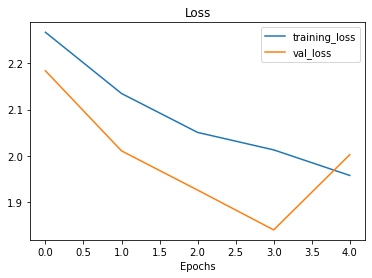

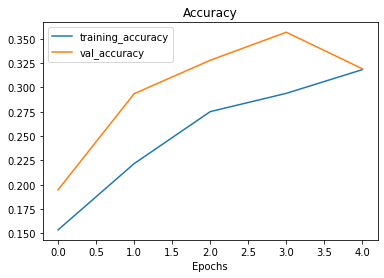

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_2)

**Making a prediction with the trained model**

In [ ]:
# A review of the classes the model has been trained on.
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# get some external images for prediction

# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Current model is a multi-class classification model.

Create pred_and_plot function to work with multiple classes as well as binary classes.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

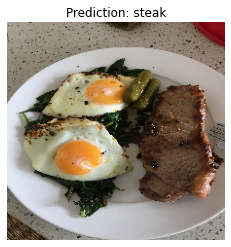

In [ ]:
pred_and_plot(model_2, "03-steak.jpeg", class_names)

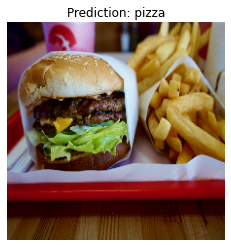

In [ ]:
pred_and_plot(model_2, "03-hamburger.jpeg", class_names)

Model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset. It needs improvement. This could be done through increasing number of epochs, adjusting learning rate or by engaging transfer learning.

Up next: Transfer learning [here](https://colab.research.google.com/drive/1sTPfy4MNufWZnJz2bOOqNqjx0YCNOxH7)

Saving and loading model_2

In [ ]:
# Save a model
model_2.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load in model_2 and evaluate it
loaded_model_2 = tf.keras.models.load_model("saved_trained_model")
loaded_model_2.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.0022 - accuracy: 0.3192


[2.0021772384643555, 0.3192000091075897]

In [ ]:
# Compare unsaved model's results (same as above)
model_2.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.0022 - accuracy: 0.3192


[2.0021772384643555, 0.3192000091075897]